We will import all libraries whichever needed, else depending on whenever needed

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale, normalize ,StandardScaler

As we already saw, that to convert txt to numpy array, we can use genfromtxt, so we will use it here from after downloading our dataset from given source.

In [4]:
nh = np.genfromtxt('sat1.trn')
print (nh.shape)

(4435, 37)


Now, for converting it to dataframe, we need to decide the names of their respective columns, so we did

In [7]:
names = ['wr1','wr2','wr3','wr4','wr5','wr6','wr7','wr8','wr9','wr10','wr11','wr12','wr13','wr14','wr15','wr16','wr17','wr18','wr19','wr20','wr21','wr22','wr23','wr24','wr25','wr26','wr27','wr28','wr29','wr30','wr31','wr32','wr33','wr34','wr35','wr36','wr37']
df = pd.DataFrame(nh, columns = names)
df

,wr1,wr2,wr3,wr4,wr5,wr6,wr7,wr8,wr9,wr10,...,wr28,wr29,wr30,wr31,wr32,wr33,wr34,wr35,wr36,wr37
0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,102.0,...,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0,3.0
1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,102.0,...,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0,3.0
2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,94.0,...,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0,3.0
3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,94.0,...,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0,3.0
4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,102.0,...,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56.0,64.0,108.0,96.0,64.0,71.0,108.0,96.0,68.0,75.0,...,92.0,66.0,83.0,108.0,96.0,66.0,87.0,104.0,89.0,5.0
4431,64.0,71.0,108.0,96.0,68.0,75.0,108.0,96.0,71.0,87.0,...,96.0,66.0,87.0,104.0,89.0,63.0,87.0,104.0,89.0,5.0
4432,68.0,75.0,108.0,96.0,71.0,87.0,108.0,88.0,71.0,91.0,...,89.0,63.0,87.0,104.0,89.0,70.0,100.0,104.0,85.0,4.0
4433,71.0,87.0,108.0,88.0,71.0,91.0,100.0,81.0,76.0,95.0,...,89.0,70.0,100.0,104.0,85.0,70.0,91.0,104.0,85.0,4.0


In [10]:
y = df['wr37'].values
y[-6:-5]

array([5.])

In [11]:
dff = df.drop(columns=['wr37'])
dff

,wr1,wr2,wr3,wr4,wr5,wr6,wr7,wr8,wr9,wr10,...,wr27,wr28,wr29,wr30,wr31,wr32,wr33,wr34,wr35,wr36
0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,102.0,...,134.0,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0
1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,102.0,...,128.0,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0
2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,94.0,...,113.0,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0
3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,94.0,...,104.0,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0
4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,102.0,...,104.0,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56.0,64.0,108.0,96.0,64.0,71.0,108.0,96.0,68.0,75.0,...,108.0,92.0,66.0,83.0,108.0,96.0,66.0,87.0,104.0,89.0
4431,64.0,71.0,108.0,96.0,68.0,75.0,108.0,96.0,71.0,87.0,...,108.0,96.0,66.0,87.0,104.0,89.0,63.0,87.0,104.0,89.0
4432,68.0,75.0,108.0,96.0,71.0,87.0,108.0,88.0,71.0,91.0,...,104.0,89.0,63.0,87.0,104.0,89.0,70.0,100.0,104.0,85.0
4433,71.0,87.0,108.0,88.0,71.0,91.0,100.0,81.0,76.0,95.0,...,104.0,89.0,70.0,100.0,104.0,85.0,70.0,91.0,104.0,85.0


Now, we will split our satellite dataset into 70:30 ratio

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dff,y,test_size=0.3,random_state=1,stratify = y)

Previously , some random numbers of neighbors were taken, but once we found best number of neighbors equal to 12, we did it for 12.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [48]:
knn.predict(X_test)[:-5]

array([2., 2., 2., ..., 3., 7., 3.])

This is our accuracy score for this model of 12 nearest neighbors.

In [49]:
knn.score(X_test,y_test)

0.8888054094665665

This was just to do some k-cross validation. where we took cv = 5

In [50]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=4)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.88566828 0.90660225 0.88405797 0.88727858 0.9016129 ]
cv_scores mean:0.8930439977144043


In [69]:
!pip install scikit-learn==0.19.2

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\siddhartha\\anaconda3\\lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



This is th emst important thing, where we actually did Grid Search cv to get optimum number of K here.

In [89]:

from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
hj = list(range(1,25))
param_grid = {'n_neighbors': hj}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, scoring = 'accuracy')
#print (knn_gscv.error)
#fit model to data
knn_gscv.fit(dff, y)
#pred = knn_gscv.predict(X_test)

In [99]:
knn_gscv.score(dff,y)

0.9129650507328072

This is done to check, how actually working happen in grid search.

In [77]:
#knn_gscv.grid_scores_
scores = knn_gscv.cv_results_#['mean_test_score'].reshape(-1, 3).T
scores

{'mean_fit_time': array([0.04969759, 0.04938774, 0.0491118 , 0.05166674, 0.04808106,
        0.04743338, 0.04817986, 0.04739723, 0.05210581, 0.04985657,
        0.05197654, 0.04892497, 0.04698992, 0.05220428, 0.05388923,
        0.05013547, 0.04905376, 0.05076447, 0.05322652, 0.05011048,
        0.04919972, 0.04853554, 0.04962115, 0.0492135 ]),
 'std_fit_time': array([0.00329176, 0.00121255, 0.00091021, 0.00431232, 0.0054341 ,
        0.00094341, 0.00142557, 0.00995209, 0.00404321, 0.00469363,
        0.00537005, 0.00122974, 0.00578359, 0.00659511, 0.00726927,
        0.0022556 , 0.0040493 , 0.00330767, 0.00638487, 0.00203251,
        0.00062535, 0.00159689, 0.00437775, 0.00121475]),
 'mean_score_time': array([0.19537063, 0.20252428, 0.21125169, 0.21262507, 0.22162161,
        0.22767005, 0.22354426, 0.22480817, 0.23137698, 0.230057  ,
        0.22964826, 0.23827243, 0.23360348, 0.23410048, 0.23706636,
        0.239995  , 0.24137807, 0.24421463, 0.24148846, 0.25469222,
        0.247525

# From here we came to know, optimal nearset number of neighbors to be 12.

In [97]:
knn_gscv.best_params_

{'n_neighbors': 12}

In [106]:
error_rate = []
for i in range(2,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

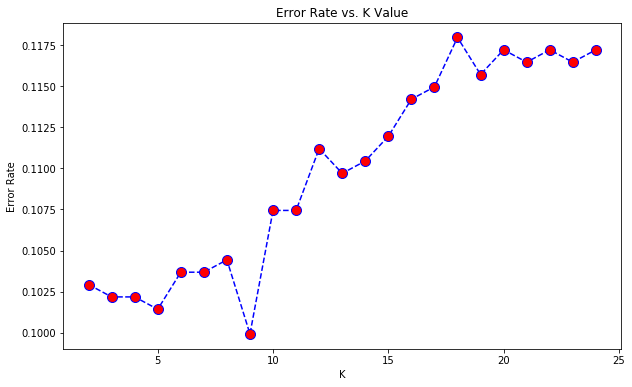

In [107]:
plt.figure(figsize=(10,6))
plt.plot(range(2,25),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [56]:
knn.score(X_test,y_test)

0.8888054094665665

Accuracy score for training set

In [105]:
knn.score(X_train,y_train)

0.8927190721649485